#### Import libraries

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPooling2D
import matplotlib.pyplot as plt
from datetime import datetime as dt

2023-08-04 09:46:38.937161: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


#### Definition of model training hyperparameters

In [2]:
EPOCHS = 10
BATCH_SIZE = 32

#### Modeling data fetching

In [3]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

In [4]:
_max_value = train_images.max().astype(np.float32)

# Data normalization
train_images, test_images = train_images/_max_value, test_images/_max_value

CLASS_NAMES = [
    'airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'
]

##### Check data

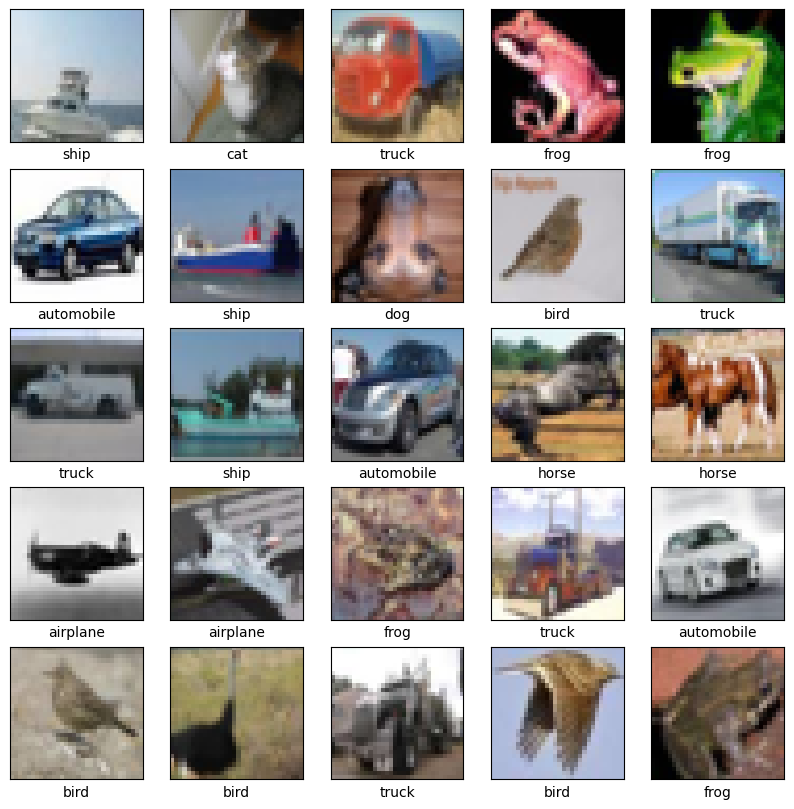

In [5]:
plt.figure(figsize=(10, 10))

for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i+100])
    plt.xlabel(CLASS_NAMES[train_labels[i+100][0]])
    
plt.show()

#### Model

##### Define

In [6]:
kargs = {
    'model_name'    : 'Cifar10CnnClassifier',
    'input_filter'  : 128,
    'conv_filter'   : 256,
    'full_units'    : 512,
    'output_dims'   : 10,
}

In [7]:
class Cifar10CnnClassifier(tf.keras.Model):
    
    def __init__(self, **kargs):
        super(Cifar10CnnClassifier, self).__init__(name=kargs['model_name'])
        
        # (3,3) --> 3, input_shape=train_images[0].shape
        # If you add the input shape, immediately run 'model.summary()'
        self._input     = Conv2D(
                              kargs['input_filter'], 
                              (3, 3), 
                              activation='relu', 
                              input_shape=train_images[0].shape
                          )
        # MaxPooling2D: (2,2) --> (1,1)
        # Reduces processing time and prevents overfitting
        self._mp2d_1    = MaxPooling2D((2,2))
        self._hidden_1  = Conv2D(kargs['conv_filter'], (3, 3), activation='relu')
        self._mp2d_2    = MaxPooling2D((2,2))
        self._hidden_2  = Conv2D(kargs['conv_filter'], (3, 3), activation='relu')
        self._mp2d_3    = MaxPooling2D((2,2))
        self._flatten   = Flatten()
        self._full_con  = Dense(kargs['full_units'], activation='relu')
        self._output    = Dense(kargs['output_dims'], activation='softmax')
        
    def call(self, input):
        _model = self._input(input)
        _model = self._mp2d_1(_model)
        _model = self._hidden_1(_model)
        _model = self._mp2d_2(_model)
        _model = self._hidden_2(_model)
        _model = self._mp2d_3(_model)
        _model = self._flatten(_model)
        _model = self._full_con(_model)
        _model = self._output(_model)
        return _model

#### Create with original

In [8]:
model_original = Cifar10CnnClassifier(**kargs)

2023-08-04 09:46:45.174192: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1635] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 22787 MB memory:  -> device: 0, name: NVIDIA TITAN RTX, pci bus id: 0000:5e:00.0, compute capability: 7.5
2023-08-04 09:46:45.175043: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1635] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 22361 MB memory:  -> device: 1, name: NVIDIA TITAN RTX, pci bus id: 0000:af:00.0, compute capability: 7.5


In [9]:
model_original.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

##### Fit

In [10]:
history = model_original.fit(
    train_images, train_labels,
    epochs=EPOCHS,
    validation_data=(test_images, test_labels)
)

Epoch 1/10


2023-08-04 09:46:49.657666: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8600
2023-08-04 09:46:50.470772: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-08-04 09:46:50.624035: I tensorflow/compiler/xla/service/service.cc:169] XLA service 0x7fb2796f0ae0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-08-04 09:46:50.624069: I tensorflow/compiler/xla/service/service.cc:177]   StreamExecutor device (0): NVIDIA TITAN RTX, Compute Capability 7.5
2023-08-04 09:46:50.624078: I tensorflow/compiler/xla/service/service.cc:177]   StreamExecutor device (1): NVIDIA TITAN RTX, Compute Capability 7.5
2023-08-04 09:46:50.629439: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-08-04 09:46:50.726158: I tensorflow/tsl/platform/default/subpr

1563/1563 [==============================] - 22s 11ms/step - loss: 1.4626 - accuracy: 0.4677 - val_loss: 1.1401 - val_accuracy: 0.5994
Epoch 2/10
1563/1563 [==============================] - 17s 11ms/step - loss: 1.0496 - accuracy: 0.6294 - val_loss: 1.0358 - val_accuracy: 0.6364
Epoch 3/10
1563/1563 [==============================] - 18s 11ms/step - loss: 0.8682 - accuracy: 0.6952 - val_loss: 0.9182 - val_accuracy: 0.6885
Epoch 4/10
1563/1563 [==============================] - 18s 11ms/step - loss: 0.7411 - accuracy: 0.7422 - val_loss: 0.8814 - val_accuracy: 0.7017
Epoch 5/10
1563/1563 [==============================] - 17s 11ms/step - loss: 0.6450 - accuracy: 0.7737 - val_loss: 0.8344 - val_accuracy: 0.7207
Epoch 6/10
1563/1563 [==============================] - 17s 11ms/step - loss: 0.5565 - accuracy: 0.8045 - val_loss: 0.9288 - val_accuracy: 0.7023
Epoch 7/10
1563/1563 [==============================] - 17s 11ms/step - loss: 0.4857 - accuracy: 0.8295 - val_loss: 0.8550 - val_accura

##### Evaluation

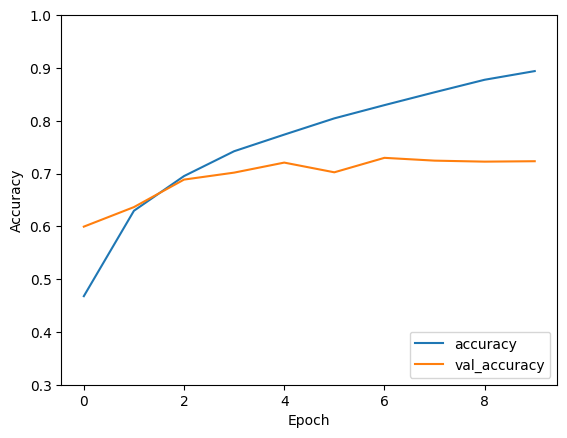

In [11]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.3, 1])
plt.legend(loc='lower right')
plt.show()

In [12]:
_test_loss, _test_accuracy = model_original.evaluate(test_images, test_labels, verbose=2)
print(f'Test loss: {_test_loss:.05f}, accuracy: {_test_accuracy:.05f}')

313/313 - 2s - loss: 1.0210 - accuracy: 0.7233 - 2s/epoch - 5ms/step
Test loss: 1.02101, accuracy: 0.72330


##### Service

In [13]:
def service_original(idx):
    # (32,32,3) --> (1,32,32,3)
    sample_data = np.array([test_images[idx]])
    # (1, 10) --> (10,)
    prediction = model_original.predict(sample_data)[0]
    
    x_labels = list(range(0, prediction.size))
    
    plt.figure(figsize=(12,5))
    
    # The first picture among the two pictures, 1 and 2
    plt.subplot(1, 2, 1)
    plt.imshow(sample_data[0, :, :, :], aspect='auto')
    plt.title('Sample image to be predicted')
    
    # The second picture among the two pictures, 1 and 2
    plt.subplot(1, 2, 2)
    plt.bar(x_labels, prediction*100)
    plt.xlabel('Index')
    plt.ylabel('Probability')
    plt.title('Probability of being the corresponding number')
    
    plt.tight_layout()
    plt.show()
    
    print(
        f'Label: {CLASS_NAMES[test_labels[idx][0]]}, '
        f'Predict: {CLASS_NAMES[np.argmax(prediction)]}'
    )

1/1 [==============================] - 0s 227ms/step


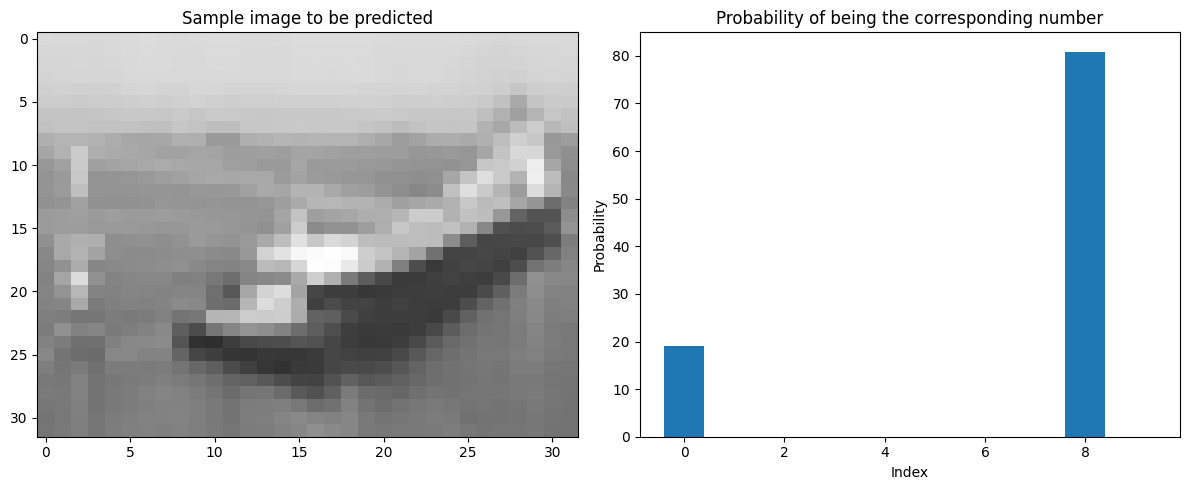

Label: ship, Predict: ship


In [14]:
service_original(120)